In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/f1nalyze-datathon-ieeecsmuj/sample_submission.csv
/kaggle/input/f1nalyze-datathon-ieeecsmuj/validation.csv
/kaggle/input/f1nalyze-datathon-ieeecsmuj/train.csv
/kaggle/input/f1nalyze-datathon-ieeecsmuj/test.csv


**Load the training data and testing data**

* Store Training data in train_df
* Store Testing data in test_df

In [2]:
train1_df=pd.read_csv("/kaggle/input/f1nalyze-datathon-ieeecsmuj/train.csv")
validation_df=pd.read_csv("/kaggle/input/f1nalyze-datathon-ieeecsmuj/validation.csv")
test_df=pd.read_csv("/kaggle/input/f1nalyze-datathon-ieeecsmuj/test.csv")

/tmp/ipykernel_18/953543711.py:1: DtypeWarning: Columns (4,13,14,16,47) have mixed types. Specify dtype option on import or set low_memory=False.
  train1_df=pd.read_csv("/kaggle/input/f1nalyze-datathon-ieeecsmuj/train.csv")
/tmp/ipykernel_18/953543711.py:2: DtypeWarning: Columns (13,16,36) have mixed types. Specify dtype option on import or set low_memory=False.
  validation_df=pd.read_csv("/kaggle/input/f1nalyze-datathon-ieeecsmuj/validation.csv")
/tmp/ipykernel_18/953543711.py:3: DtypeWarning: Columns (13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df=pd.read_csv("/kaggle/input/f1nalyze-datathon-ieeecsmuj/test.csv")


In [3]:
train1_df.head()

,resultId,racerId,driverId,constructorId,number,grid,position_x,positionText_x,positionOrder,points,...,points_y,position,positionText_y,wins,constructorRef,company,nationality_y,url,status,result_driver_standing
0,20025,833,642,51,2,1,1,1,1,9.0,...,3.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,922731975
1,20025,833,642,51,2,1,1,1,1,9.0,...,6.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,923172525
2,20025,833,642,51,2,1,1,1,1,9.0,...,6.33,4,4,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,923833350
3,20025,833,642,51,2,1,1,1,1,9.0,...,10.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,925195050
4,20025,833,642,51,2,1,1,1,1,9.0,...,10.33,4,4,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,926576775


In [4]:
validation_df.head()

,resultId,racerId,driverId,constructorId,number,grid,position_x,positionText_x,positionOrder,points,...,points_y,position,positionText_y,wins,constructorRef,company,nationality_y,url,status,result_driver_standing
0,22109,899,17,9,2,4,2,2,2,18.0,...,28.0,8,8,0,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,1410907944
1,22109,899,17,9,2,4,2,2,2,18.0,...,53.0,4,4,1,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,1411438560
2,22109,899,17,9,2,4,2,2,2,18.0,...,78.0,1,1,2,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,1412499792
3,22109,899,17,9,2,4,2,2,2,18.0,...,93.0,1,1,2,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,1413030408
4,22109,899,17,9,2,4,2,2,2,18.0,...,103.0,3,3,2,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,1413561024


In [5]:
test_df.head()

,resultId,racerId,driverId,constructorId,number,grid,position_x,positionText_x,positionOrder,points,...,driverStandingsId,raceId_y,points_y,wins,constructorRef,company,nationality_y,url,status,result_driver_standing
0,23949,997,4,1,14,13,8,8,8,4.0,...,12474,93,16.0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,+1 Lap,298739826
1,23949,997,4,1,14,13,8,8,8,4.0,...,12494,94,21.0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,+1 Lap,299218806
2,23949,997,4,1,14,13,8,8,8,4.0,...,12514,95,21.0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,+1 Lap,299697786
3,23949,997,4,1,14,13,8,8,8,4.0,...,12534,96,25.0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,+1 Lap,300176766
4,23949,997,4,1,14,13,8,8,8,4.0,...,12554,97,25.0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,+1 Lap,300655746


In [6]:
train_df = pd.concat([train1_df, validation_df], ignore_index=True)

In [7]:
train_df.head()

,resultId,racerId,driverId,constructorId,number,grid,position_x,positionText_x,positionOrder,points,...,points_y,position,positionText_y,wins,constructorRef,company,nationality_y,url,status,result_driver_standing
0,20025,833,642,51,2,1,1,1,1,9.0,...,3.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,922731975
1,20025,833,642,51,2,1,1,1,1,9.0,...,6.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,923172525
2,20025,833,642,51,2,1,1,1,1,9.0,...,6.33,4,4,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,923833350
3,20025,833,642,51,2,1,1,1,1,9.0,...,10.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,925195050
4,20025,833,642,51,2,1,1,1,1,9.0,...,10.33,4,4,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,926576775


**EDA**

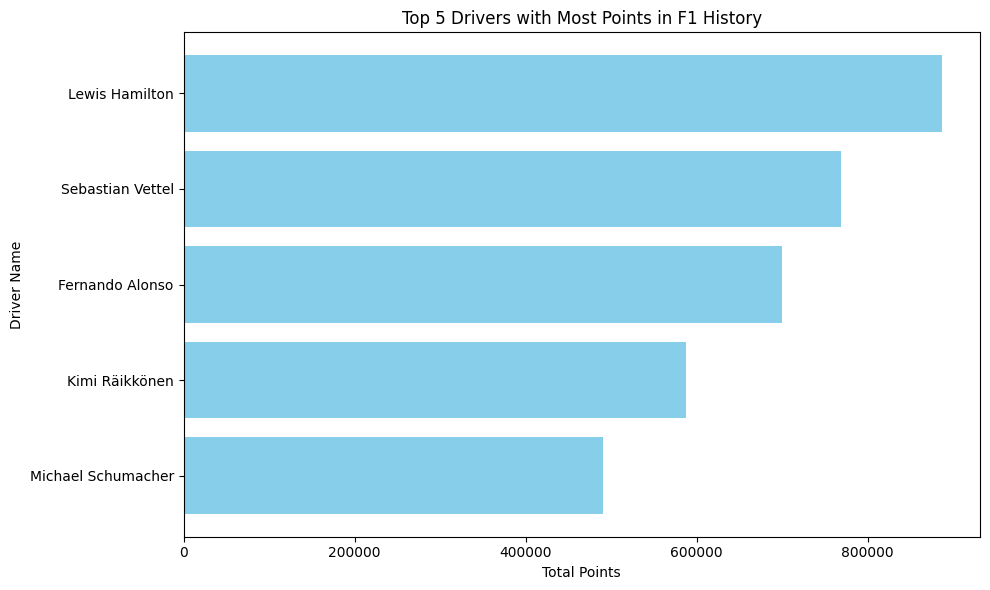

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by driverId and sum the points for each driver
points_sum = train_df.groupby('driverId')['points'].sum()

# Get the top 5 drivers with the most points
top_5_points = points_sum.nlargest(5)

# Create a DataFrame for the top 5 drivers
top_5_df = pd.DataFrame({
    'driverId': top_5_points.index,
    'total_points': top_5_points.values
})

# Get driver names
driver_names = []
for driver_id in top_5_df['driverId']:
    driver_details = train_df[train_df['driverId'] == driver_id].iloc[0]
    driver_name = f"{driver_details['forename']} {driver_details['surname']}"
    driver_names.append(driver_name)

top_5_df['driver_name'] = driver_names

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_5_df['driver_name'], top_5_df['total_points'], color='skyblue')

# Add labels, title, and legend
ax.set_xlabel('Total Points')
ax.set_ylabel('Driver Name')
ax.set_title('Top 5 Drivers with Most Points in F1 History')
ax.invert_yaxis()  # Invert y-axis to show the driver with the most points at the top

# Show plot
plt.tight_layout()
plt.show()

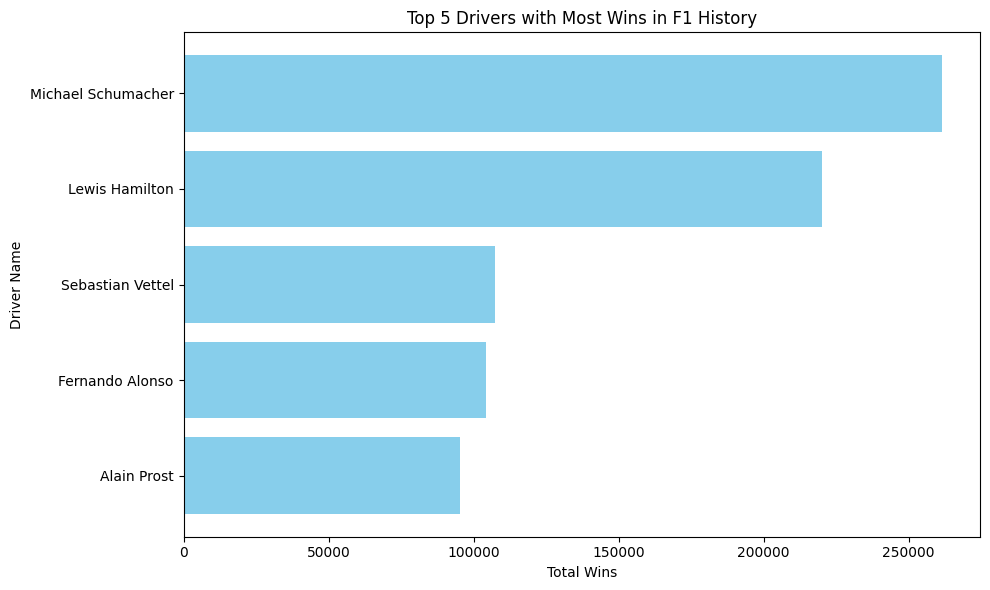

In [9]:
# Filter the dataset to only include rows where a driver has won a race
wins_df = train_df[train_df['wins'] > 0]

# Group by driverId and count the wins for each driver
wins_count = wins_df.groupby('driverId')['wins'].sum()

# Get the top 5 drivers with the most wins
top_5_wins = wins_count.nlargest(5)

# Create a DataFrame for the top 5 drivers
top_5_df = pd.DataFrame({
    'driverId': top_5_wins.index,
    'total_wins': top_5_wins.values
})

# Get driver names
driver_names = []
for driver_id in top_5_df['driverId']:
    driver_details = train_df[train_df['driverId'] == driver_id].iloc[0]
    driver_name = f"{driver_details['forename']} {driver_details['surname']}"
    driver_names.append(driver_name)

top_5_df['driver_name'] = driver_names

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_5_df['driver_name'], top_5_df['total_wins'], color='skyblue')

# Add labels, title, and legend
ax.set_xlabel('Total Wins')
ax.set_ylabel('Driver Name')
ax.set_title('Top 5 Drivers with Most Wins in F1 History')
ax.invert_yaxis()  # Invert y-axis to show the driver with the most wins at the top

# Show plot
plt.tight_layout()
plt.show()

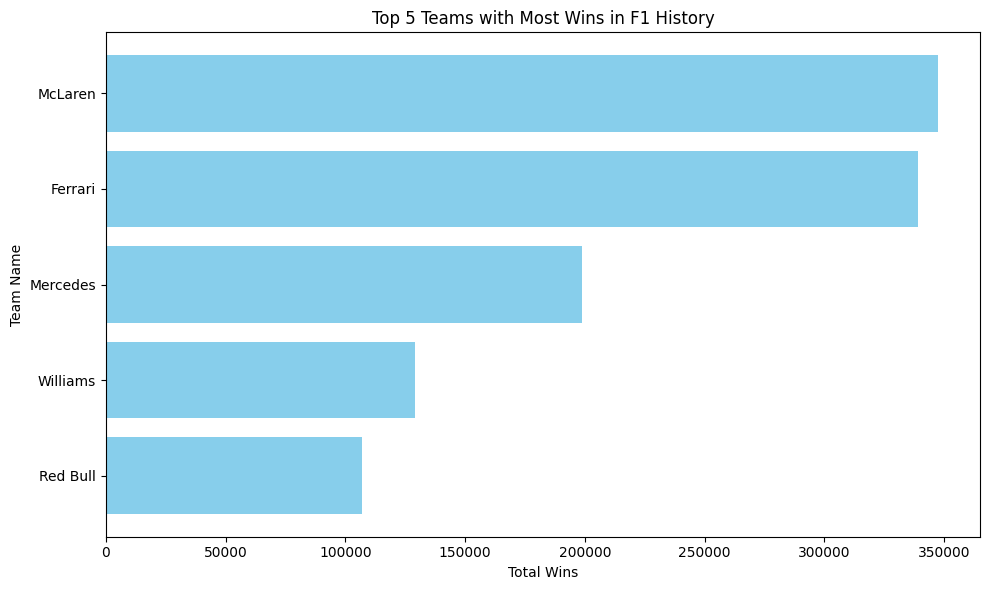

In [10]:
# Filter the dataset to only include rows where a team has won a race
wins_df = train_df[train_df['wins'] > 0]

# Group by constructorId and count the wins for each team
wins_count = wins_df.groupby('constructorId')['wins'].sum()

# Get the top 5 teams with the most wins
top_5_wins = wins_count.nlargest(5)

# Create a DataFrame for the top 5 teams
top_5_df = pd.DataFrame({
    'constructorId': top_5_wins.index,
    'total_wins': top_5_wins.values
})

# Get team names
team_names = []
for constructor_id in top_5_df['constructorId']:
    team_details = train_df[train_df['constructorId'] == constructor_id].iloc[0]
    team_name = team_details['company']
    team_names.append(team_name)

top_5_df['team_name'] = team_names

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_5_df['team_name'], top_5_df['total_wins'], color='skyblue')

# Add labels, title, and legend
ax.set_xlabel('Total Wins')
ax.set_ylabel('Team Name')
ax.set_title('Top 5 Teams with Most Wins in F1 History')
ax.invert_yaxis()  # Invert y-axis to show the team with the most wins at the top

# Show plot
plt.tight_layout()
plt.show()

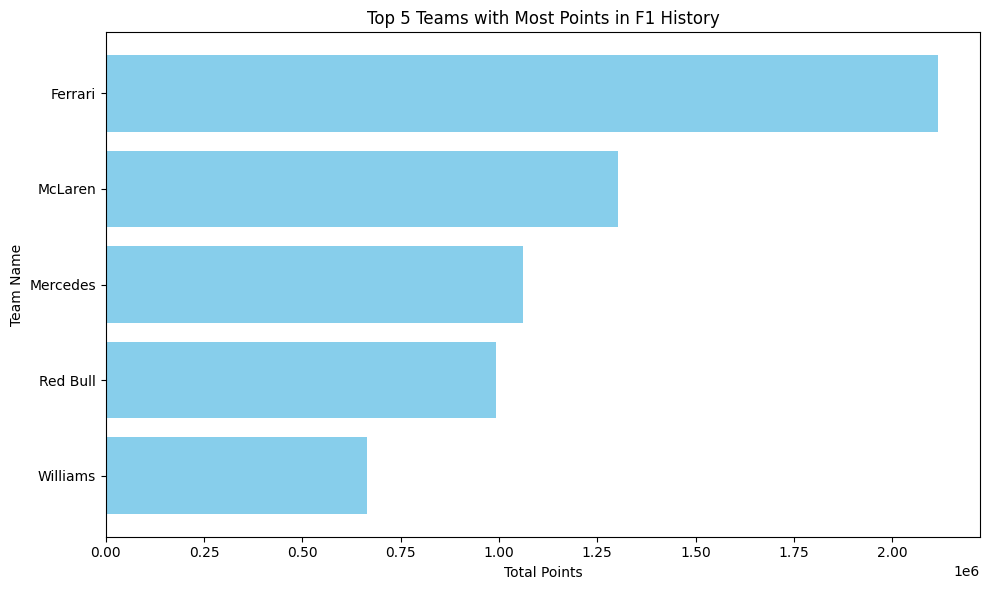

In [11]:
# Group by constructorId and sum the points for each team
points_count = train_df.groupby('constructorId')['points'].sum()

# Get the top 5 teams with the most points
top_5_points = points_count.nlargest(5)

# Create a DataFrame for the top 5 teams
top_5_df = pd.DataFrame({
    'constructorId': top_5_points.index,
    'total_points': top_5_points.values
})

# Get team names
team_names = []
for constructor_id in top_5_df['constructorId']:
    team_details = train_df[train_df['constructorId'] == constructor_id].iloc[0]
    team_name = team_details['company']
    team_names.append(team_name)

top_5_df['team_name'] = team_names

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_5_df['team_name'], top_5_df['total_points'], color='skyblue')

# Add labels, title, and legend
ax.set_xlabel('Total Points')
ax.set_ylabel('Team Name')
ax.set_title('Top 5 Teams with Most Points in F1 History')
ax.invert_yaxis()  # Invert y-axis to show the team with the most points at the top

# Show plot
plt.tight_layout()
plt.show()

**Data Preprocessing**

* Drop unnecessary features
* Handling Missing values
* Encoding categorical variables
* Date Components Extraction

In [12]:
train_df.replace('\\N', pd.NA, inplace=True)

In [13]:
train_df.isnull().sum()

resultId                        0
racerId                         0
driverId                        0
constructorId                   0
number                        160
grid                            0
position_x                1187480
positionText_x                  0
positionOrder                   0
points                          0
laps                            0
time_x                    2027052
timetaken_in_millisec     2027107
fastestLap                2128400
rank                      2105375
fastestLapTime            2128400
max_speed                 2128400
statusId                        0
year                            0
round                           0
circuitId                       0
grand_prix                      0
date                            0
time_y                    2150026
url_x                           0
fp1_date                  3183863
fp1_time                  3183863
fp2_date                  3183863
fp2_time                  3183863
fp3_date      

In [14]:
#Dropping the features that containing more missing values and unnecessary features
train_df=train_df.drop(['position_x', 'time_x', 'timetaken_in_millisec', 'fastestLap', 'rank','fastestLapTime', 'max_speed', 'time_y', 'url_x', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'driver_num','driver_code', 'url_y', 'url', 'positionText_y', 'resultId', 'racerId', 'driverRef', 'forename', 'surname'],axis=1)
test_df=test_df.drop(['position_x', 'time_x', 'timetaken_in_millisec', 'fastestLap', 'rank','fastestLapTime', 'max_speed', 'time_y', 'url_x', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'driver_num','driver_code', 'url_y', 'url', 'resultId', 'racerId', 'driverRef', 'forename', 'surname'],axis=1)

In [15]:
#Handling Missing Values
train_df.replace(['\\N'], pd.NA, inplace=True)
train_df.replace(['R', 'N', 'W', 'D', 'F', 'E'], 0, inplace=True)
train_df.dropna(inplace=True)
test_df.replace(['\\N', 'R', 'N', 'W', 'D', 'F', 'E'], 0, inplace=True)

In [16]:
#Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_df['grand_prix'] = label_encoder.fit_transform(train_df['grand_prix'])
train_df['nationality'] = label_encoder.fit_transform(train_df['nationality'])
train_df['constructorRef'] = label_encoder.fit_transform(train_df['constructorRef'])
train_df['company'] = label_encoder.fit_transform(train_df['company'])
train_df['nationality_y'] = label_encoder.fit_transform(train_df['nationality_y'])
train_df['status'] = label_encoder.fit_transform(train_df['status'])

test_df['grand_prix'] = label_encoder.fit_transform(test_df['grand_prix'])
test_df['nationality'] = label_encoder.fit_transform(test_df['nationality'])
test_df['constructorRef'] = label_encoder.fit_transform(test_df['constructorRef'])
test_df['company'] = label_encoder.fit_transform(test_df['company'])
test_df['nationality_y'] = label_encoder.fit_transform(test_df['nationality_y'])
test_df['status'] = label_encoder.fit_transform(test_df['status'])

**Feature Engineering**

In [17]:
#Drivers Age
train_df['dob'] = pd.to_datetime(train_df['dob'])
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['dob'] = pd.to_datetime(test_df['dob'])
test_df['date'] = pd.to_datetime(test_df['date'])

train_df['driver_age'] = train_df['date'].dt.year - train_df['dob'].dt.year
test_df['driver_age'] = test_df['date'].dt.year - test_df['dob'].dt.year

/tmp/ipykernel_18/3935338225.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df['dob'] = pd.to_datetime(test_df['dob'])
/tmp/ipykernel_18/3935338225.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df['date'] = pd.to_datetime(test_df['date'])


In [18]:
#Remove dob and Date of the race
train_df=train_df.drop(['dob', 'date'],axis=1)
test_df=test_df.drop(['dob', 'date'],axis=1)

In [19]:
# Change in position
train_df['position_change'] = train_df['grid'] - train_df['positionOrder']
test_df['position_change'] = test_df['grid'] - test_df['positionOrder']

**Build Machine Learning Model**

In [20]:
train_df.isnull().sum()

driverId                  0
constructorId             0
number                    0
grid                      0
positionText_x            0
positionOrder             0
points                    0
laps                      0
statusId                  0
year                      0
round                     0
circuitId                 0
grand_prix                0
nationality               0
driverStandingsId         0
raceId_y                  0
points_y                  0
position                  0
wins                      0
constructorRef            0
company                   0
nationality_y             0
status                    0
result_driver_standing    0
driver_age                0
position_change           0
dtype: int64

In [21]:
X_train=train_df.drop(columns='position',axis=1)
y_train=train_df['position']

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', random_state=127)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=200, random_state=127)

In [23]:
predictions = rf.predict(test_df)

In [24]:
test_ids = test_df['result_driver_standing']

In [25]:
submission_df = pd.DataFrame({'position': predictions , 'result_driver_standing': test_ids})

In [26]:
submission_df.to_csv("submission.csv", index=False)